In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint 
import requests
import time
from IPython.display import display

# Machine learning para TEMPERATURAS

In [3]:
def ml_temp_start(df_datos_est_num):
    # Quitamos tmed ya que es la temperatura media

    X = np.array(df_datos_est_num.drop(["tmax","tmed"], axis = 1))
    y = np.array(df_datos_est_num["tmax"])
    print("Datos numéricos guardados en array X,y")
    print("-_"*50)
    print(X,y)
    
    return (X,y)


# Train / test / yhat

In [4]:
# TRAIN
def  ml_temp_train_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

    print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")
    
    print("-_"*50)

# Modelo

# Algoritmo de regresión lineal de sklearn

    regresion_lineal = LinearRegression()
    regresion_lineal.fit(X_train, y_train)

    # Encontramos los coeficientes de la recta  
    print ("weights:", regresion_lineal.coef_)
    print ("w_0:", regresion_lineal.intercept_)
    print("-_"*50)
    
    
#     YHAT 
    yhat = regresion_lineal.predict(X_test)

    for i, j in zip(yhat[:5], y_test[:5]):
        print(f"Predicción:{i} \tValor real:{j}")

    print("-_"*50)

    print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
    print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
    print(f"R**2:\t {r2_score(yhat, y_test)}")


    # Veamos los valores de yhat, y_test y su diferencia

    df_pred = pd.DataFrame()

    df_pred["y_test"] = y_test.flatten()
    df_pred["yhat"] = yhat.flatten()

    df_pred["diferencia"] = round(abs(df_pred["y_test"] - df_pred["yhat"]), 4)

    df_pred = df_pred.sort_values("diferencia")

    print("-_"*50)

    display(df_pred.head(20))
    print("-_"*50)
    display(df_pred.tail(20))

    print("-_"*50)
    
    # Vamos a comparar que tan alejados estan los valores reales (y_test) y los valores predichos (y_train)

    plt.figure(figsize = (10, 8))

    sns.scatterplot(x = y_test.flatten(), y = yhat.flatten(), alpha = 0.5, color = "blue")

    plt.xlabel("Valores Reales (y_train)", size = 18)
    plt.ylabel("Predicciones (yhat)", size = 18)

    return plt.show()

# Predecimos la temperatura para un dia cualquiera metiendo dia, mes y año

In [5]:
def inc_model_temp():
    df = pd.read_csv("df_datos_est_num.csv")

    X = np.array(df[["Day_x","Month","Year"]])
    y = np.array(df["tmax"])

    display(df)
    print("_-"*50)
    
    # Procesamiento Tª
    x_scaler = MinMaxScaler()
    X = x_scaler.fit_transform(X)

    # TRAIN
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

    print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

    # Algoritmo de regresión lineal de sklearn

    regresion_lineal = LinearRegression()
    regresion_lineal.fit(X_train, y_train)

    # Encontramos los coeficientes de la recta 
    print("_-"*50)
    print ("weights:", regresion_lineal.coef_)
    print ("w_0:", regresion_lineal.intercept_)


    yhat = regresion_lineal.predict(X_test)
    
    print("_-"*50)
    for i, j in zip(yhat[:5], y_test[:5]):
        print(f"Predicción:{i} \tValor real:{j}")

    # Sklearn tiene las formulas de algunas métricas en funciones.
    print("_-"*50)
    print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
    print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
    print(f"R**2:\t {r2_score(yhat, y_test)}")

    # Veamos los valores de yhat, y_test y su diferencia

    df_pred = pd.DataFrame()

    df_pred["y_test"] = y_test.flatten()
    df_pred["yhat"] = yhat.flatten()

    df_pred["diferencia"] = round(abs(df_pred["y_test"] - df_pred["yhat"]), 4)

    df_pred = df_pred.sort_values("diferencia")

    display(df_pred.head(10))
    print("_-"*50)
    display(df_pred.tail(10))

In [6]:
def inc_ingesar_fecha():

    # Pedir al usuario que ingrese el día
    
    while True:
        day = input("Ingrese un día entre 1 y 31: ")
        try:
            day = int(day)
            if 1 <= day <= 31:
                break
            else:
                print("El numero debe estar entre 1 y 31.")
        except ValueError:
            print("El valor ingresado no es un numero entero.")
        
        
        

    # Pedir al usuario que ingrese el mes

    while True:
        month = input("Ingrese un mes (en número) entre 1 y 12: ")
        try:
            month = int(month)
            if 1 <= month <= 31:
                break
            else:
                print("El numero debe estar entre 1 y 12.")
        except ValueError:
            print("El valor ingresado no es un numero entero.")
        

    # Pedir al usuario que ingrese el año
   
    while True:
        year = input("Ingrese el año del futuro (en número) entre 2023 y lo que quieras: ")
        try:
            year = int(year)
            if 2023 <= year <= 9999:
                break
            else:
                print("El numero debe estar entre 2023 y 9999.")
        except ValueError:
            print("El valor ingresado no es un numero entero.")
        
        
#      Imprimimos tabla de  lugares para que el usuario pueda  coger el ID   
    df_codigos_ema=pd.read_excel("codigos emas y concellos.xlsx")
    display(df_codigos_ema.drop(columns=["codigo concello"]))
#     Pedimos el lugar

    while True:
        place = input("Ingrese el lugar (en número) entre 1 y 15: ")
        try:
            place = int(place)
            if 1 <= place <= 15:
                break
            else:
                print("El numero debe estar entre 1 y 15.")
        except ValueError:
            print("El valor ingresado no es un numero entero.")
            
            
        

    # Mostrar la fecha ingresada
    print("La fecha ingresada es:", day, "-", month, "-", year)
    print("En el ID del lugar es: ",place  )
    lista=[[day,month,year,place]]
    lista=np.array(lista)
    return lista

In [7]:

def inc_predecir_temp():
    df_datos_est_num = pd.read_csv("df_datos_est_num.csv")


    X = np.array(df_datos_est_num[["Day_x","Month","Year","ID"]])
    y = np.array(df_datos_est_num["tmax"])



    # Llamo a la funcion fecha para ingresar los datos

    X_test= inc_ingesar_fecha()
    print(X_test)


    regresion_lineal = LinearRegression()
    regresion_lineal.fit(X, y)


    yhat = regresion_lineal.predict(X_test)

    # Veamos los valores de yhat, y_test y su diferencia

    print("\033[1m",yhat[0],"ºC")

In [8]:
def inc_graf_tem_year(df_datos_est_num):
    plt.figure(figsize = (12, 10))
    sns.scatterplot(x = df_datos_est_num["Year"], y = df_datos_est_num["tmax"], hue=df_datos_est_num["tmax"])
    
    return plt.show()

In [9]:
def ml_temp_graf(df_datos_est_num):
    df_1=df_datos_est_num.groupby('Year')["tmax"].mean()
    df_1=pd.DataFrame(df_1.reset_index(0))
    
    group = df_1.groupby('Year')
    
    plt.figure(figsize = (10, 8))

    plt.plot(df_1['Year'], df_1["tmax"])
    print("Por Año Y temperatura se ve que en estos 15 años las temperaturas máximas estan creciendo,CALENTAMIENTO GOBLAL!!")

    return plt.show()

In [10]:
#  colors = {2001:'red', 2002:'blue', 2003:'green',2004:'orange', 2005:'m', 2006:'black',
#              2007:'red', 2008:'blue', 2009:'green',2010:'orange', 2011:'m', 2012:'black',
#              2013:'red', 2014:'blue'}

# Llamamos a las funciones

In [11]:
df_datos_est_num = pd.read_csv("df_datos_est_num.csv")

In [12]:
datos=ml_temp_start(df_datos_est_num)

Datos numéricos guardados en array X,y
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
[[ 98.   11.7   9.8 ... 105.    1.    0. ]
 [ 98.    7.2   8.  ... 105.    1.    0. ]
 [ 98.   30.1   9.2 ... 105.    1.    0. ]
 ...
 [255.    0.    2.2 ...  99.    1.   15. ]
 [255.    0.    0.7 ...  99.    1.   15. ]
 [255.    0.    1.6 ...  99.    1.   15. ]] [14.1 11.5 14.4 ... 13.8 12.5 13.7]


X_train: (57069, 18), y_train: (57069,)
X_test: (19024, 18),  y_test: (19024,)
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
weights: [ 4.10847383e-04 -8.60454335e-02  4.77627729e-01 -2.62267028e-04
 -1.63009254e-01 -9.57597623e-02  3.01073171e-02  1.77371957e-02
  4.26614088e-03 -2.51392275e-01  6.93446761e-02  1.85628338e-01
 -2.20278306e-06 -4.61365362e-02 -2.00087968e-01  8.75487920e-02
  0.00000000e+00  7.59287809e-02]
w_0: -37.593861187714474
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Predicción:15.22376081858328 	Valor real:15.3
Predicción:20.141352795150155 	Valor real:20.1
Predicción:10.032813430544437 	Valor real:15.8
Predicción:16.698831987096987 	Valor real:15.0
Predicción:18.9701012371859 	Valor real:20.8
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
MAE:	 2.553422655555323
MSE:	 10.81110312886066
R**2:	 0.6

,y_test,yhat,diferencia
18079,17.700000,17.699657,0.0003
18617,21.933333,21.932959,0.0004
18806,15.200000,15.199549,0.0005
14644,25.100000,25.100680,0.0007
14879,14.000000,13.999226,0.0008
2664,17.400000,17.401080,0.0011
6539,14.800000,14.798294,0.0017
14914,17.900000,17.901988,0.0020
14624,11.900000,11.897864,0.0021
13606,20.100000,20.102474,0.0025


-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_


,y_test,yhat,diferencia
6233,29.0,17.184666,11.8153
13642,28.5,16.598395,11.9016
17105,38.1,26.052292,12.0477
17301,30.5,18.411164,12.0888
1545,20.7,32.808799,12.1088
18493,13.1,25.349309,12.2493
1199,29.8,17.550127,12.2499
6006,28.5,16.184671,12.3153
12899,30.6,18.271753,12.3282
17653,28.6,16.256194,12.3438


-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_


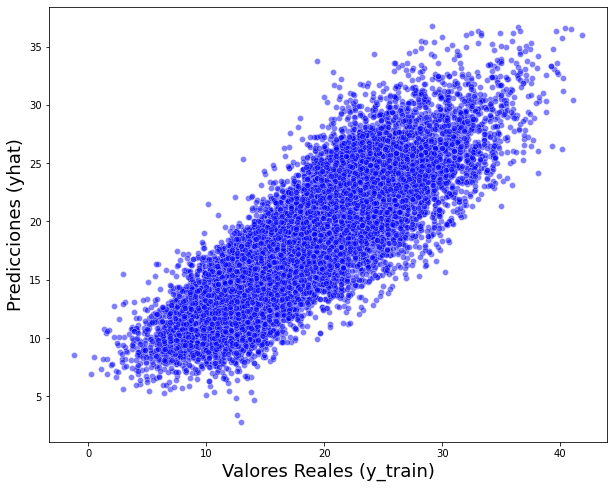

In [13]:
test=ml_temp_train_test(datos[0],datos[1])

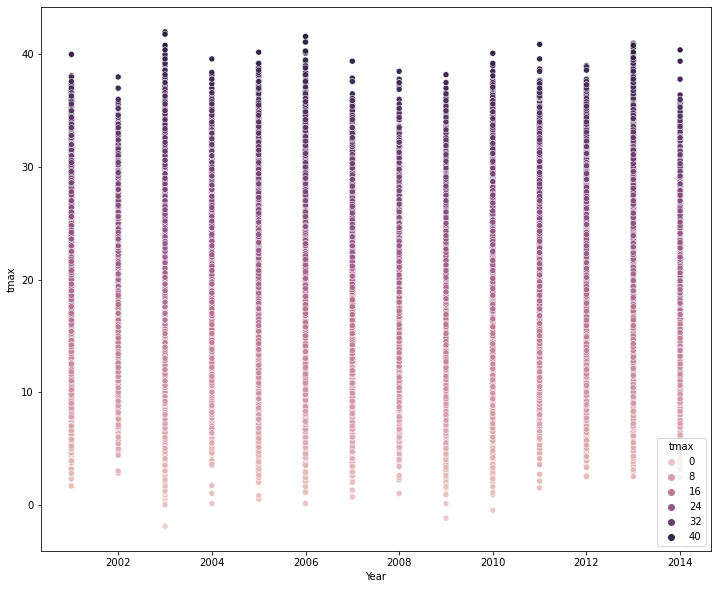

In [14]:
inc_graf_tem_year(df_datos_est_num)

Por Año Y temperatura se ve que en estos 15 años las temperaturas máximas estan creciendo,CALENTAMIENTO GOBLAL!!


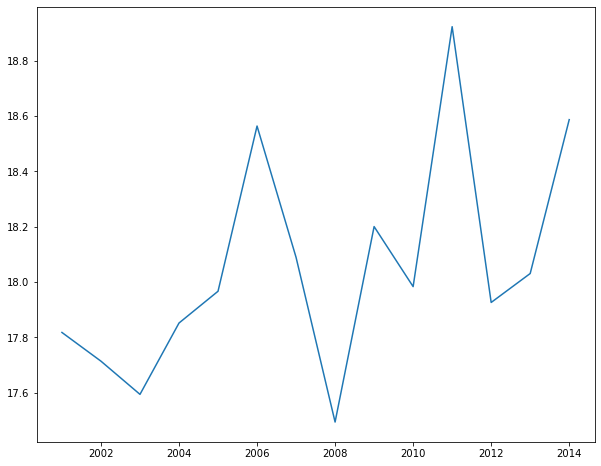

In [15]:
ml_temp_graf(df_datos_est_num)

In [16]:
inc_model_temp()

,altitud,tmed,prec,tmin,tmax,dir,velmedia,racha,Year,Month,Day_x,hr,tm_min,nt_30,w_racha,np_100,ta_min,e,Day_y,ID
0,98.0,12.0,11.7,9.8,14.1,25.0,7.2,18.6,2001.0,1.0,1.0,82.0,7.3,0.0,33.0,9.0,1.8,105.0,1.0,0.0
1,98.0,9.8,7.2,8.0,11.5,33.0,5.8,15.0,2001.0,1.0,2.0,82.0,7.3,0.0,33.0,9.0,1.8,105.0,1.0,0.0
2,98.0,11.8,30.1,9.2,14.4,29.0,7.8,25.8,2001.0,1.0,3.0,82.0,7.3,0.0,33.0,9.0,1.8,105.0,1.0,0.0
3,98.0,12.4,31.8,10.1,14.6,23.0,7.2,23.1,2001.0,1.0,4.0,82.0,7.3,0.0,33.0,9.0,1.8,105.0,1.0,0.0
4,98.0,12.4,16.7,8.3,16.4,28.0,9.7,24.2,2001.0,1.0,5.0,82.0,7.3,0.0,33.0,9.0,1.8,105.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76088,255.0,8.6,1.8,4.1,13.2,26.0,1.9,7.2,2014.0,12.0,27.0,85.0,5.6,0.0,2.0,1.0,0.7,99.0,1.0,15.0
76089,255.0,8.5,0.9,4.8,12.2,35.0,3.6,12.5,2014.0,12.0,28.0,85.0,5.6,0.0,2.0,1.0,0.7,99.0,1.0,15.0
76090,255.0,8.0,0.0,2.2,13.8,5.0,2.8,9.7,2014.0,12.0,29.0,85.0,5.6,0.0,2.0,1.0,0.7,99.0,1.0,15.0
76091,255.0,6.6,0.0,0.7,12.5,9.0,2.8,8.9,2014.0,12.0,30.0,85.0,5.6,0.0,2.0,1.0,0.7,99.0,1.0,15.0


_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
X_train: (53265, 3), y_train: (53265,)
X_test: (22828, 3),  y_test: (22828,)
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
weights: [-0.06472936  3.55747758  0.60462904]
w_0: 15.98205849571713
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Predicción:17.510398768855087 	Valor real:15.3
Predicción:16.440680036648384 	Valor real:20.1
Predicción:16.264475072773756 	Valor real:15.8
Predicción:19.01067529849601 	Valor real:15.0
Predicción:17.25411025480333 	Valor real:20.8
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
MAE:	 4.96185132200229
MSE:	 37.935295850712855
R**2:	 -29.29306409308167


,y_test,yhat,diferencia
2941,17.500000,17.496495,0.0035
685,17.400000,17.395802,0.0042
3525,17.000000,16.995674,0.0043
7389,17.600000,17.594783,0.0052
17775,18.900000,18.893921,0.0061
19540,16.400000,16.406162,0.0062
12866,16.266667,16.260155,0.0065
16110,16.800000,16.793336,0.0067
11631,18.500000,18.506748,0.0067
11507,16.600000,16.607296,0.0073


_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-


,y_test,yhat,diferencia
21306,39.6,18.012405,21.5876
1609,40.1,18.282834,21.8172
10325,40.4,18.328139,22.0719
22312,40.0,17.922501,22.0775
8078,40.2,18.120528,22.0795
16427,40.2,18.120528,22.0795
10958,41.1,18.793234,22.3068
13294,40.9,18.469832,22.4302
20777,40.8,18.334612,22.4654
8331,41.8,18.321667,23.4783


In [18]:
inc_predecir_temp()

Ingrese un día entre 1 y 31: 10
Ingrese un mes (en número) entre 1 y 12: 2
Ingrese el año del futuro (en número) entre 2023 y lo que quieras: 2025


,ID,indicativo,Nombre,Provincia,Altitud,Latitud,Longitud
0,0,1387E,A CORUÑA AEROPUERTO,A CORUÑA,98 m.,431825N,082219W
1,1,1387,A CORUÑA,A CORUÑA,58 m.,432157N,082517W
2,2,1393,CABO VILÁN,A CORUÑA,50 m.,430938N,091239W
3,3,1351,ESTACA DE BARES,A CORUÑA,90 m.,434710N,074106W
4,4,1400,FISTERRA,A CORUÑA,230 m.,425529N,091729W
5,5,1437O,MONTE IROITE,A CORUÑA,685 m.,424314N,085524W
6,6,1473A,PADRÓN,A CORUÑA,100 m.,424418N,083738W
7,7,1428,SANTIAGO AEROPUERTO,A CORUÑA,370 m.,425317N,082438W
8,8,1475X,SANTIAGO DE COMPOSTELA,A CORUÑA,240 m.,425234N,083321W
9,9,1505,LUGO AEROPUERTO,LUGO,445 m.,430641N,072727W


Ingrese el lugar (en número) entre 1 y 15: 8
La fecha ingresada es: 10 - 2 - 2025
En el ID del lugar es:  8
[[  10    2 2025    8]]
 17.47365923202088 ºC
